In [1]:
import pandas as pd
import ntpath
import glob

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP
from map_plot import choropleth

# Population

In this notebook, we create *static time-series* regarding the population for the administrative regions of the following countries:

- Yemen;
- Nigeria;
- Burkina Faso;
- Syria;

With the term *static*, we mean time-series that not change over time. We select a certain starting year as reference to create our time-series until another reference year.

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Define reference dates to build the time-series.
FIRST_YEAR = "2017"
LAST_YEAR = "2021"

In [5]:
# Load the data released by wfp.
print("The data released by wfp:")
df = pd.read_csv("./wfp_data/populations.csv")
df.head()

The data released by wfp:


,adm0_name,adm0_code,adm1_name,adm1_code,population
0,Burkina Faso,42,BOUCLE-DU-MOUHOUN,900712.0,1816310
1,Burkina Faso,42,CASCADES,900713.0,755896
2,Burkina Faso,42,CENTRE,900714.0,2623394
3,Burkina Faso,42,CENTRE-EST,900715.0,2623394
4,Burkina Faso,42,CENTRE-NORD,900716.0,1551284


In [6]:
# Change the name of adminstrata feature.
df.rename(columns = {"adm0_name": "Country", "adm1_name": "AdminStrata", "population": "Population"}, inplace = True)
# Delete geometry feature.
df.drop(columns = ["adm0_code", "adm1_code"], inplace = True)
df.head()

,Country,AdminStrata,Population
0,Burkina Faso,BOUCLE-DU-MOUHOUN,1816310
1,Burkina Faso,CASCADES,755896
2,Burkina Faso,CENTRE,2623394
3,Burkina Faso,CENTRE-EST,2623394
4,Burkina Faso,CENTRE-NORD,1551284


In [7]:
# The strings of AdminStrata key for Burkina Faso country are uppercase, I change them to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country == "Burkina Faso":
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

In [8]:
# Create multi-index columns dataframe.
df = df.set_index(["Country", "AdminStrata"]).unstack().unstack().reorder_levels([2, 1, 0]).to_frame().sort_index(0).transpose().dropna(axis = 1)
df.columns.set_names("Indicator", level = 2, inplace = True)
df

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Population Population Population Population  Population   
0                   1816310.0   755896.0  2623394.0  2623394.0   1551284.0   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Population Population Population    Population Population  ...   
0              1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Population Population Population Population Population Population   
0            2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Population Population Population Population  
0            1469960.0   665881.0    68247.0  3065034.0  

[1 rows x 58 columns]

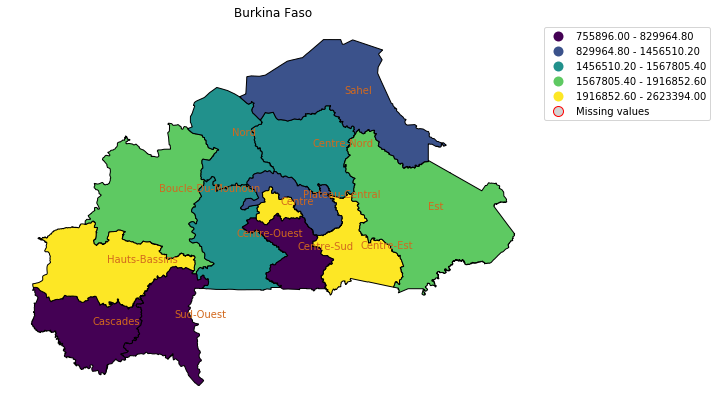

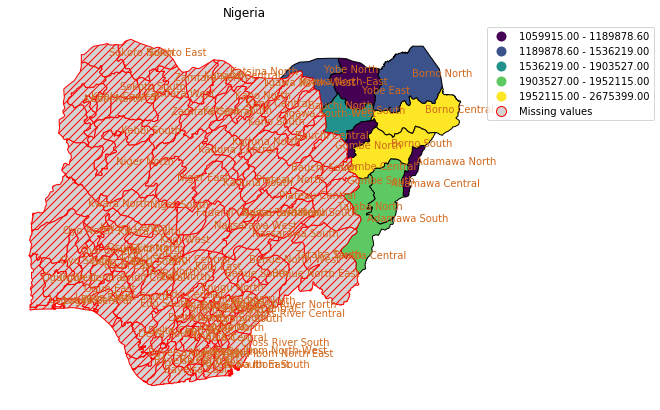

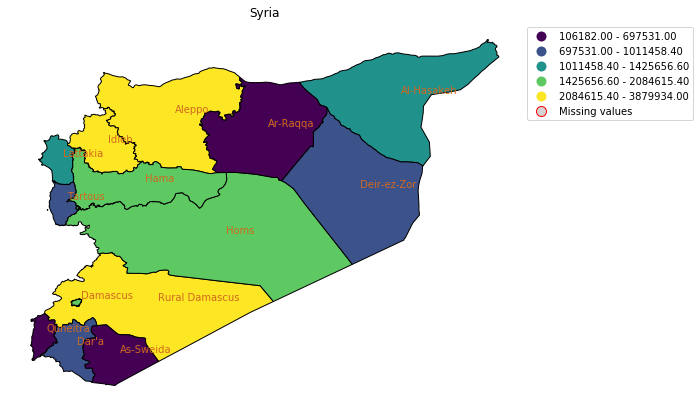

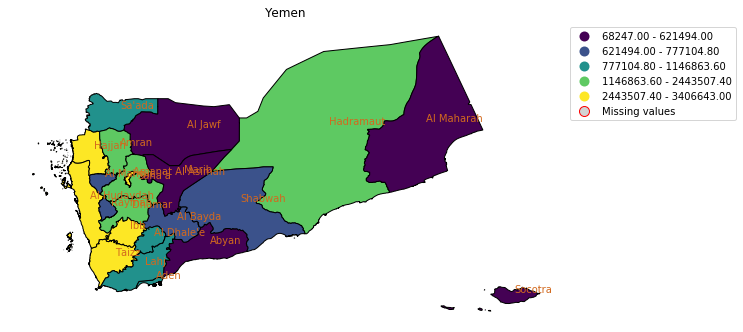

In [9]:
# Plot a choropleth map of the populations.
for country in df.columns.levels[0]:
    # Define pandas serie quantiles.
    quantiles = df[country].droplevel(level = 1, axis = 1).loc[0]
    
    if country == "Nigeria":
        boundaries = "senatorial districts"
    else:
        boundaries = "administrative level 1"
    
    # Plot map.
    choropleth(country, quantiles, "../Shape Files/shapefiles/" + country + "/" + boundaries, figsize = (10, 7), annotation = True)

In [10]:
# Create static time-series of the population.
new_index = pd.date_range(FIRST_YEAR, LAST_YEAR, freq = "D")
df = df.loc[df.index.repeat(len(new_index))]
df.index = new_index
df.index.name = "Datetime"
df

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Population Population Population Population  Population   
Datetime                                                                     
2017-01-01          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2017-01-02          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2017-01-03          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2017-01-04          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2017-01-05          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
...                       ...        ...        ...        ...         ...   
2020-12-28          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2020-12-29          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2020-12-30          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2020-12-31          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   
2021-01-01          1816310.0   755896.0  2623394.0  2623394.0   1551284.0   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Population Population Population    Population Population  ...   
Datetime                                                                 ...   
2017-01-01     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2017-01-02     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2017-01-03     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2017-01-04     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2017-01-05     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
...                  ...        ...        ...           ...        ...  ...   
2020-12-28     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2020-12-29     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2020-12-30     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2020-12-31     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   
2021-01-01     1510412.0   801374.0  1633891.0     1983881.0  1500082.0  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Population Population Population Population Population Population   
Datetime                                                                        
2017-01-01   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2017-01-02   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2017-01-03   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2017-01-04   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2017-01-05   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
...                ...        ...        ...        ...        ...        ...   
2020-12-28   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2020-12-29   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2020-12-30   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2020-12-31   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   
2021-01-01   2510327.0  3080130.0  1058219.0   495634.0   646854.0   981401.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Population Population Population Population  
Datetime                                                 
2017-01-01   1469960.0   665881.0    68247.0  3065034.0  
2017-01-02   1469960.0   665881.0    68247.0  3065034.0  
2017-01-03   1469960.0   665881.0    68247.0  3065034.0  
2017-0

In [11]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [12]:
# Save the dataframes.
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_population"));

In [13]:
# Plot static time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Population")

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…